# Data Cleaning Notebook

## Objectives

* Assess and handle missing values 
* Clean data

## Inputs

* outputs/datasets/collection/HousePrices.csv

## Outputs

* Cleaned data in outputs/datasets/cleaned
* Data cleaning pipline

## Conclusions

* Nine out of 24 variables (75% of the columns) have missing values.
* We use the following methods to handle missing data:
    * Mean imputation: variables=['LotFrontage' , 'BedroomAbvGr']
    * Median imputation: variables=['2ndFlrSF', 'MasVnrArea']
    * categorical imputation: variables=['GarageFinish' , 'BsmtFinType1']
    * Dropping variables: features_to_drop=['EnclosedPorch', 'GarageYrBlt', 'WoodDeckSF']


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePrices.csv")
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration

In the quick display of the first five rows of our dataframe object above, we already see four columns and several cells with missing values. Here we dig deeper and get all variables that have missing values.

 * Nine out of 24 variables (which is 75% of the columns) have missing values. 

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [6]:
len(vars_with_missing_data)

9

In [7]:
df[vars_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtFinType1   1346 non-null   object 
 3   EnclosedPorch  136 non-null    float64
 4   GarageFinish   1298 non-null   object 
 5   GarageYrBlt    1379 non-null   float64
 6   LotFrontage    1201 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 102.8+ KB


### Profile Report

* We generate pandas profiling report for each variable with missing values.
  * We import pandas_profiling library and generate a profile report.

In [ ]:
# Code from walkthrough project 02, data cleaning notebook
from pandas_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

 * We note that some of the variables with missing values also have too many zeros. 

---

# Data Cleaning

## Assessing Missing Data Levels

* Custom function to display missing data levels in a dataframe, it shows the aboslute levels, relative levels and data type

In [8]:
def EvaluateMissingData(df):
  """
  Function to evaluate data with missing values
  """
  missing_data_absolute = df.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df)*100 , 2)
  df_missing_data = (pd.DataFrame(
                          data= {"RowsWithMissingData": missing_data_absolute,
                                 "PercentageOfDataset": missing_data_percentage,
                                 "DataType":df.dtypes}
                                  )
                    .sort_values(by=['PercentageOfDataset'],ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

  return df_missing_data

Check missing data levels for collected dataset

In [9]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


* We can see that two variables, namely ['EnclosedPorch', 'WoodDeckSF'], have more than 85% missing values each.

* These variables may warrant dropping them because they will have little or no predictive power.

## Handling Missing Data

* Defining DataCleaningEffect() function
  * Code copied and adapted from Unit 9 of the feature engine lesson

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):
  """
  Function to visualize data cleaning effect
  """
  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

### Data Cleaning Summary

* Drop ['EnclosedPorch', 'WoodDeckSF'] because each has more than 80% missing values. Even though these are important variables that add to the size of a property, we do not expect them to have predictive power at this point because they lack significant variation across the spectrum of houses. Most houses, having all levels of prices, have missing values for these variables, so we can safely drop them.

* Imputations

   * We will use Mean Imputation for 'LotFrontage' and 'BedroomAbvGr', because their distributions look fairly close to the normal distribution. So we will replace the missing data in these features with their respective mean values.

   * We will use Median Imputation to handle the missing values of '2ndFlrSF', 'GarageYrBlt' and 'MasVnrArea'. These features are also close to being normally distributed but we use median instead of mean to replace the missing data with. When the data is skewed, the mean is likely to be highly affected by the extreme values and may not be representative of the data. So we use the most commonly observed values.  

   * For 'GarageFinish' and 'BsmtFinType1', we use Categorical Imputation because these are categorical variables and we cannot use MeanMedian imputer for non-numerical variables. 

### Split Train and Test Set

We split the dataset to Train and Test sets so that we can train the data using our imputation methods on the Train Set and see the effects on the Test Set.

In [11]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


As we did before, we first check the number of variables in the train set with missing values to make sure that the split represents the whole dataset.

In [13]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 9 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1056,90.41,float64
WoodDeckSF,1034,88.53,float64
LotFrontage,212,18.15,float64
GarageFinish,131,11.22,object
BsmtFinType1,89,7.62,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
MasVnrArea,6,0.51,float64


### 1. Drop variables
* Variables to drop: ['EnclosedPorch', 'WoodDeckSF']
* We create a separate data frame applying the imputation method and assess the effect of this data cleaning step.
* List columns of the new data frame to see if the variables have beed dropped.

In [14]:
from feature_engine.selection import DropFeatures

variables_to_drop=['EnclosedPorch' , 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_to_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_to_drop:
    print(i in df_method.columns.to_list())

False
False


### 2. Mean Imputation
* Variables: ['LotFrontage' , 'BedroomAbvGr']


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['LotFrontage', 'BedroomAbvGr'] 




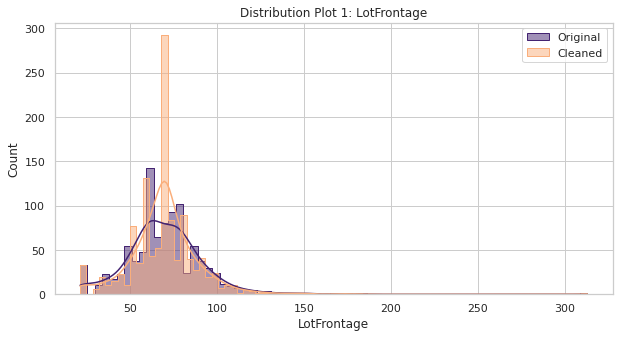

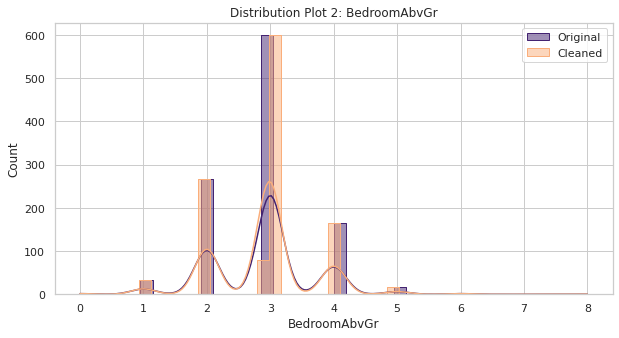

In [15]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['LotFrontage' , 'BedroomAbvGr']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_mean)

### 3. Median Imputation
* Variables: ['2ndFlrSF' , 'GarageYrBlt', 'MasVnrArea']


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'] 




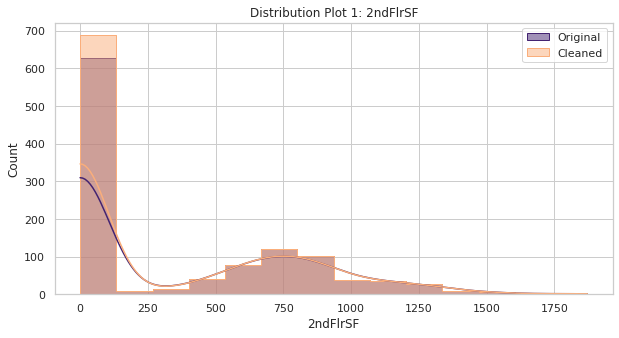

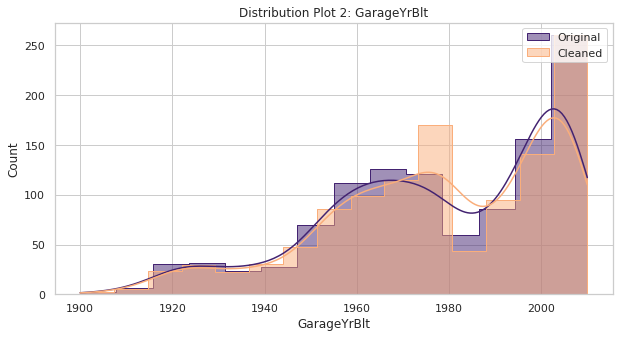

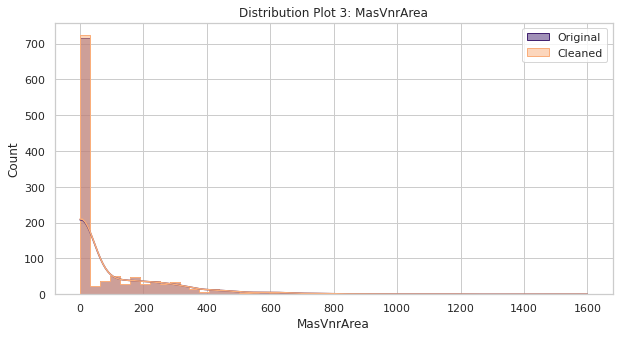

In [16]:
variables_median = ['2ndFlrSF' , 'GarageYrBlt', 'MasVnrArea']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_median)

Looking at the effect of median imputation on GarageYrBlt, most of the imputed values are concentrated around 1975. 
We inspect if the missing values indicate that there is no garage at all.
* The below data shows where GarageYrBlt is NaN, GarageArea is zero.
* Intuitively, the size of the garage is likely to have more effect on sales price than its age. So we can consider dropping GarageYrBlt.

In [17]:
TrainSet[(TrainSet['GarageArea'] ==0)][['GarageYrBlt', 'GarageArea']]

,GarageYrBlt,GarageArea
431,NaN,0
638,NaN,0
1337,NaN,0
528,NaN,0
960,NaN,0
1011,NaN,0
1283,NaN,0
1038,NaN,0
165,NaN,0
1349,NaN,0


### 4. Categorical Imputation
* Variables: ['GarageFinish' , 'BsmtFinType1']


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['GarageFinish', 'BsmtFinType1'] 




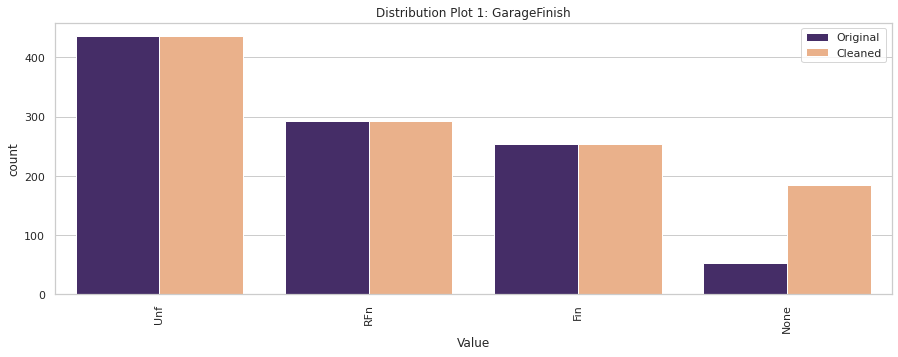

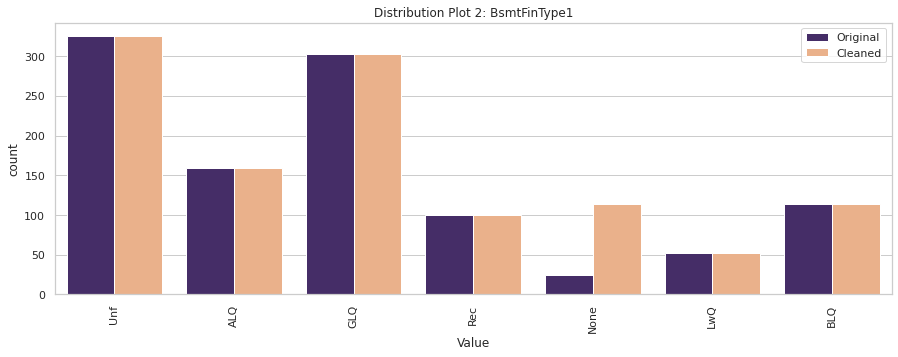

In [18]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)

In [19]:
TrainSet[(TrainSet['GarageArea'] ==0)][['GarageFinish', 'GarageArea']]

,GarageFinish,GarageArea
431,NaN,0
638,None,0
1337,None,0
528,NaN,0
960,None,0
1011,None,0
1283,None,0
1038,None,0
165,None,0
1349,None,0


In [20]:
TrainSet[(TrainSet['TotalBsmtSF'] ==0)][['BsmtFinType1', 'TotalBsmtSF']]

,BsmtFinType1,TotalBsmtSF
156,None,0
646,None,0
259,None,0
984,None,0
1011,None,0
553,None,0
1045,None,0
371,None,0
533,None,0
1412,None,0


### Data Cleaning Pipeline

* We organize all the data cleaning steps we want to use in a single data cleaning pipeline.

* This pipeline has the following steps:
    * Mean imputation: variables=['LotFrontage' , 'BedroomAbvGr']
    * Median imputation: variables=['2ndFlrSF', 'MasVnrArea']
    * categorical imputation: variables=['GarageFinish' , 'BsmtFinType1']
    * Dropping variables: features_to_drop=['EnclosedPorch', 'GarageYrBlt', 'WoodDeckSF']

In [21]:
from sklearn.pipeline import Pipeline

dataCleaning_pipeline = Pipeline([
      ( 'mean',  MeanMedianImputer(imputation_method='mean',
                                     variables=['LotFrontage' , 'BedroomAbvGr']) ),
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['2ndFlrSF', 'MasVnrArea']) ),
      ( 'categorical',  CategoricalImputer(imputation_method='missing',
                                     fill_value='None',
                                     variables=['GarageFinish' , 'BsmtFinType1']) ),
      ( 'drop',  DropFeatures(features_to_drop=['EnclosedPorch', 'GarageYrBlt', 'WoodDeckSF']) )
])

* Now we can apply the pipeline to the whole dataset to get cleaned data.

In [22]:
TrainSet, TestSet = dataCleaning_pipeline.fit_transform(TrainSet) , dataCleaning_pipeline.fit_transform(TestSet)

In [23]:
df = dataCleaning_pipeline.fit_transform(df)

In [24]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [25]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [26]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


Invoking the function that evaluates missing data shows that we have effectively handled all missing data in our data, the Train, Test and original data sets.

---

## Push files to Repo

In [27]:
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


### Train Set

In [28]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

### Test Set

In [29]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

### Cleaned Dataset

In [30]:
df.to_csv("outputs/datasets/cleaned/HousePricesCleaned.csv", index=False)

#### Save Data Cleaning Pipeline

* We have to save the data cleaning pipeline for later use to clean inherited houses provided to us by our client.

In [31]:
import joblib

file_path = f'outputs/ml_pipeline/data_cleaning'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/data_cleaning'


In [33]:
joblib.dump(value=dataCleaning_pipeline, filename=f"{file_path}/dataCleaning_pipeline.pkl")

['outputs/ml_pipeline/data_cleaning/dataCleaning_pipeline.pkl']